In [ ]:
import pandas as pd
data = pd.read_csv("insurance.csv")
df = pd.DataFrame(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


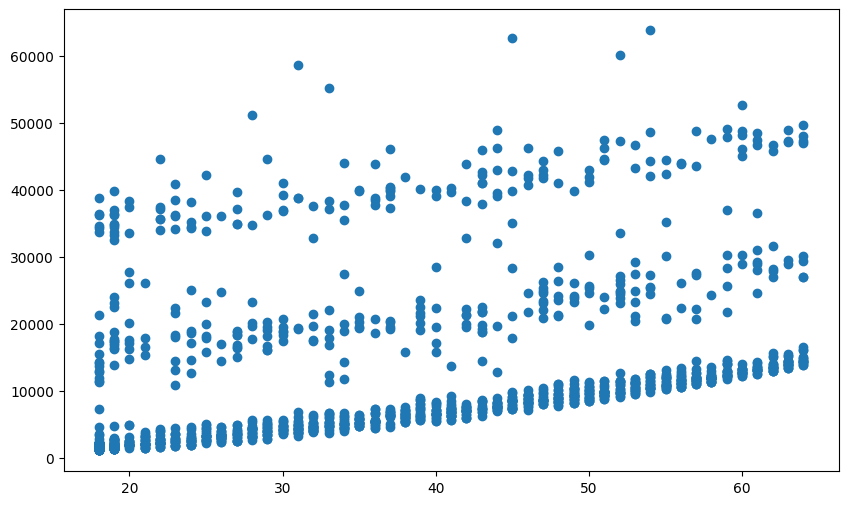

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x=df['age'],y=df['charges'])
plt.show()

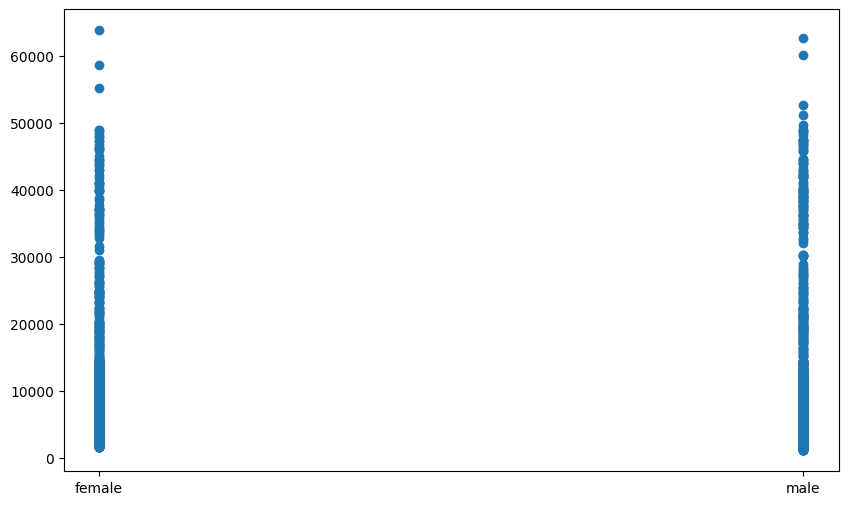

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['sex'],y=df['charges'])
plt.show()

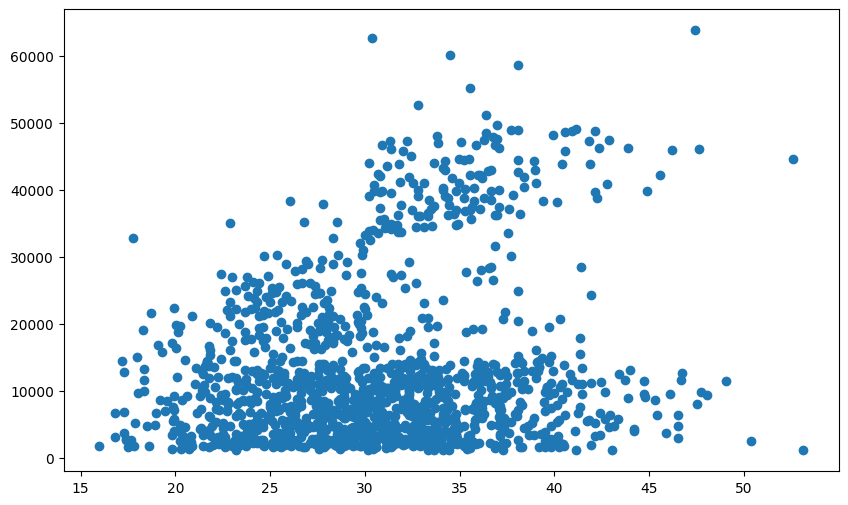

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['bmi'],y=df['charges'])
plt.show()

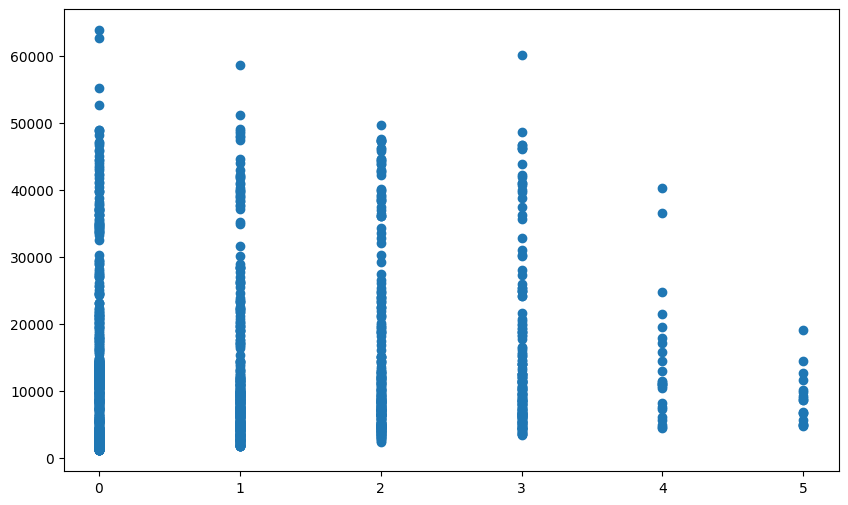

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['children'],y=df['charges'])
plt.show()

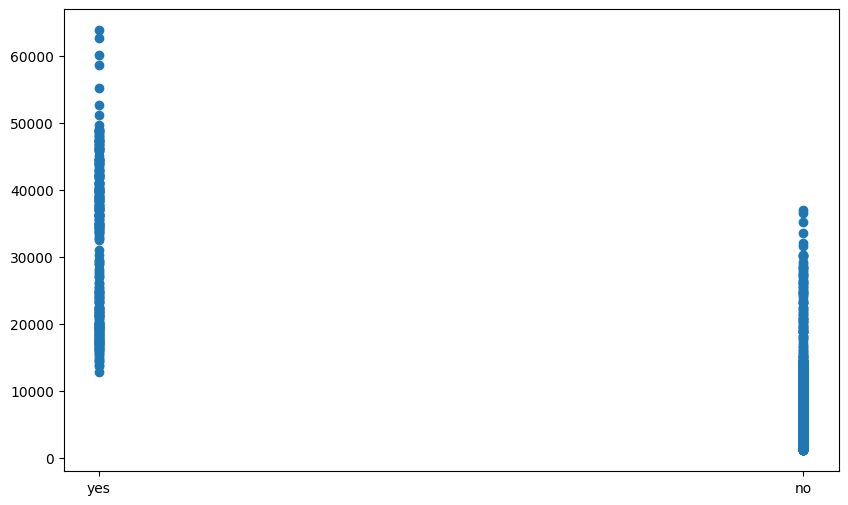

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['smoker'],y=df['charges'])
plt.show()

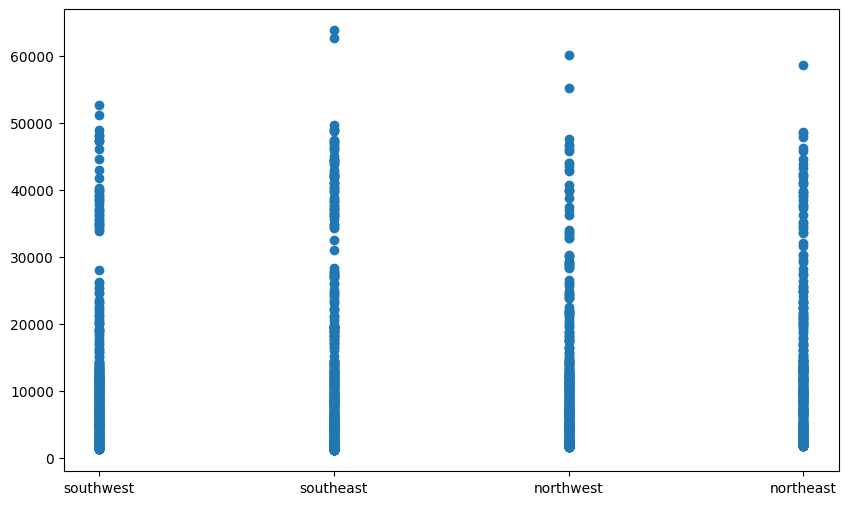

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['region'],y=df['charges'])
plt.show()

In [ ]:
target = df["charges"]
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
df.drop(['charges'], axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()




df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [ ]:
x = df
y = target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x,y)


DecisionTreeRegressor()

In [ ]:
train = model.predict(x_train)
r2_score(y_train, train)

0.9991884437733782

In [ ]:
y = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y)

0.996271271810283

In [ ]:
model.feature_importances_
print(x.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


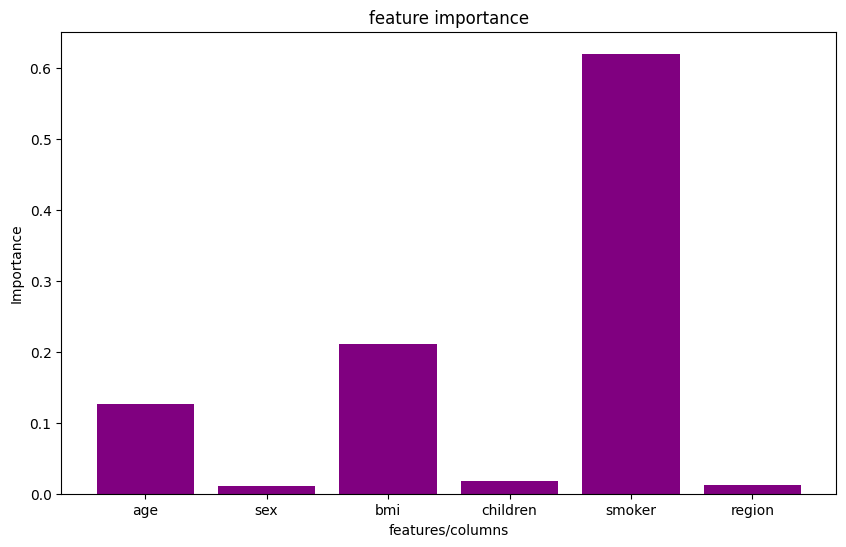

In [ ]:
plt.figure(figsize=(10,6))
plt.title("feature importance")
plt.bar(x.columns,model.feature_importances_, color= "purple")
plt.xlabel("features/columns")
plt.ylabel('Importance')
plt.show()

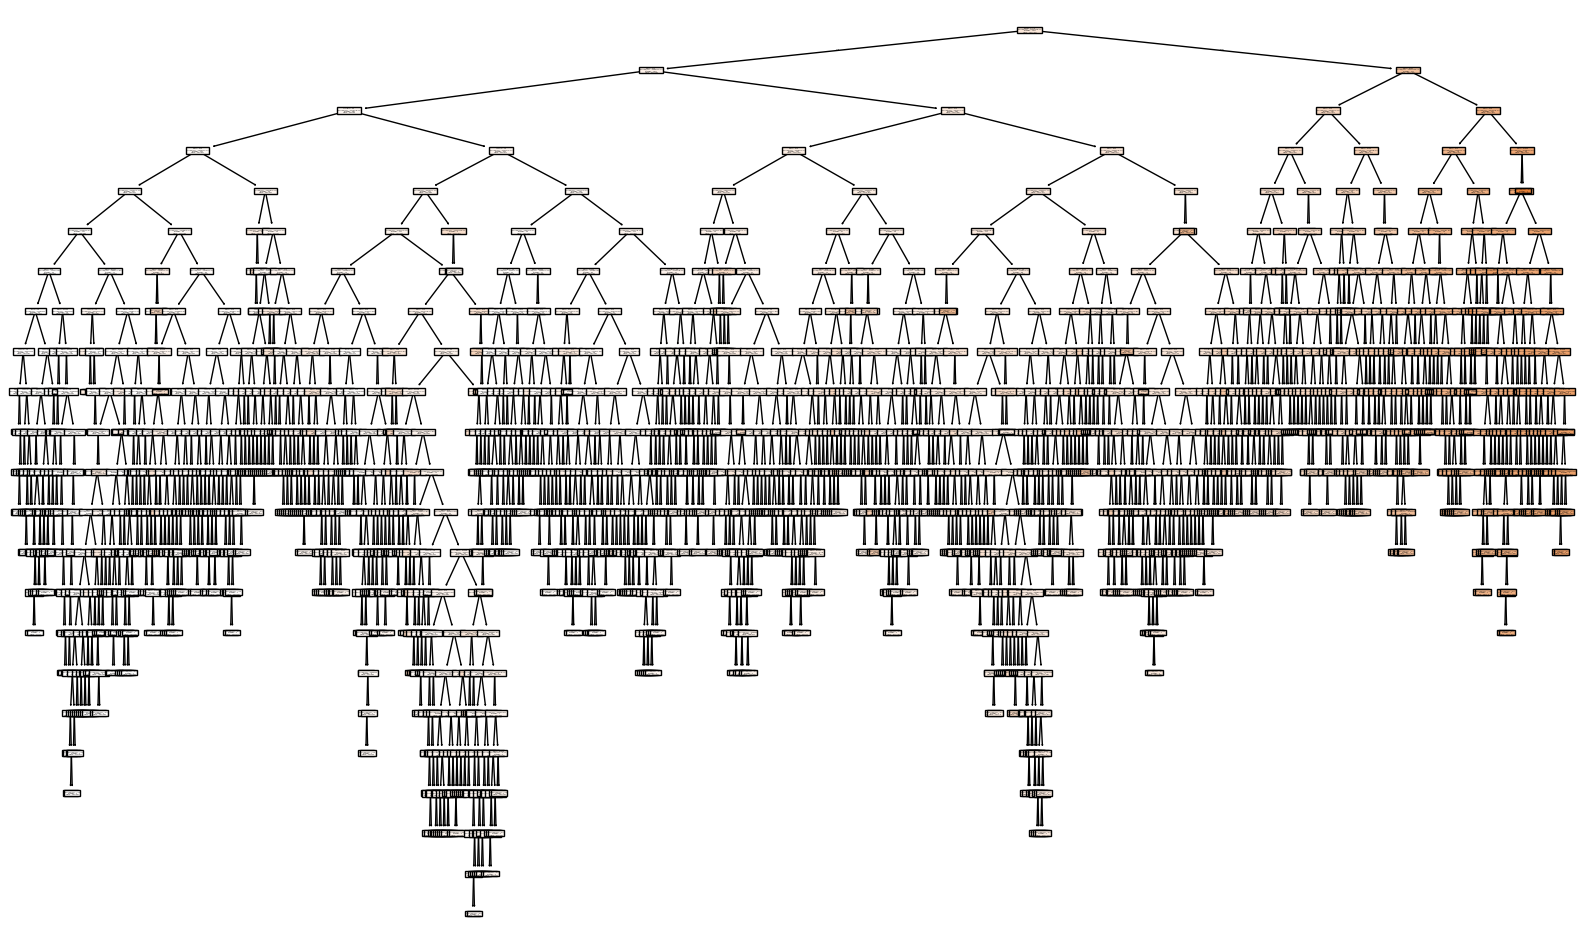

In [ ]:
import seaborn as sns
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(model, feature_names=x.columns, filled= True)
plt.show()